In [1]:
%matplotlib notebook
#This notebook finds the optimal TDS return chirp to use with the audio rnage finding lab

In [2]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['figure.dpi'] = 80

In [3]:
#32-bit floating-point [-1.0,+1.0] np.float32
#from scipy.io.wavfile import write
#write('test.wav', int(fs), np.real(chirp).astype(np.float32))

In [4]:
T_F=61
target_distance_feet=20

T_C=(T_F-32)*5/9;
speed_of_sound_in_air_m_per_sec=331+0.6*T_C
meter_to_feet=3.281;
target_distance_m=target_distance_feet/meter_to_feet;
round_trip_distance_m=2*target_distance_m;

In [5]:
#Tc is the max depth we are interested in
Tc_sec=1
f_start_Hz=3e3
f_stop_Hz=20e3

S_Hz_per_sec = (f_stop_Hz - f_start_Hz) / Tc_sec
original_chirp_filename='../data/audio_chirp_1sec_3KHz_20KHz.wav'
(original_chirps_fs, original_chirp_data)=wavfile.read(original_chirp_filename)
original_chirp_data.shape

(44100,)

In [6]:
collect_filename='../data/house_bose_front_20ft.wav'
(collect_fs, collect_data)=wavfile.read(collect_filename)
collect_data.shape

(1652001, 2)

In [7]:
chirp_corr=np.correlate(original_chirp_data, collect_data[:,0])

In [8]:
chirp_corr.shape[0]

1607902

In [9]:
#For normalized cross correlation compute the energy a each position
segment_length=original_chirp_data.shape[0]
energy_level=np.zeros((collect_data.shape[0]-segment_length,1))
for ii in np.arange(0,energy_level.shape[0]):
    energy_level[ii,0]=np.sum(np.absolute(collect_data[ii:(ii+segment_length-1),0]))
    

In [10]:

t_sec=np.arange(0,chirp_corr.shape[0],1)/collect_fs
d_m=speed_of_sound_in_air_m_per_sec*t_sec;

In [11]:
chirp_corr=np.correlate(original_chirp_data, collect_data[:,0])

In [12]:
print(repr(np.squeeze(chirp_corr[0:1607901]).shape))
print(repr(np.squeeze(energy_level[0:1607901]).shape))


(1607901,)
(1607901,)


<IPython.core.display.Javascript object>


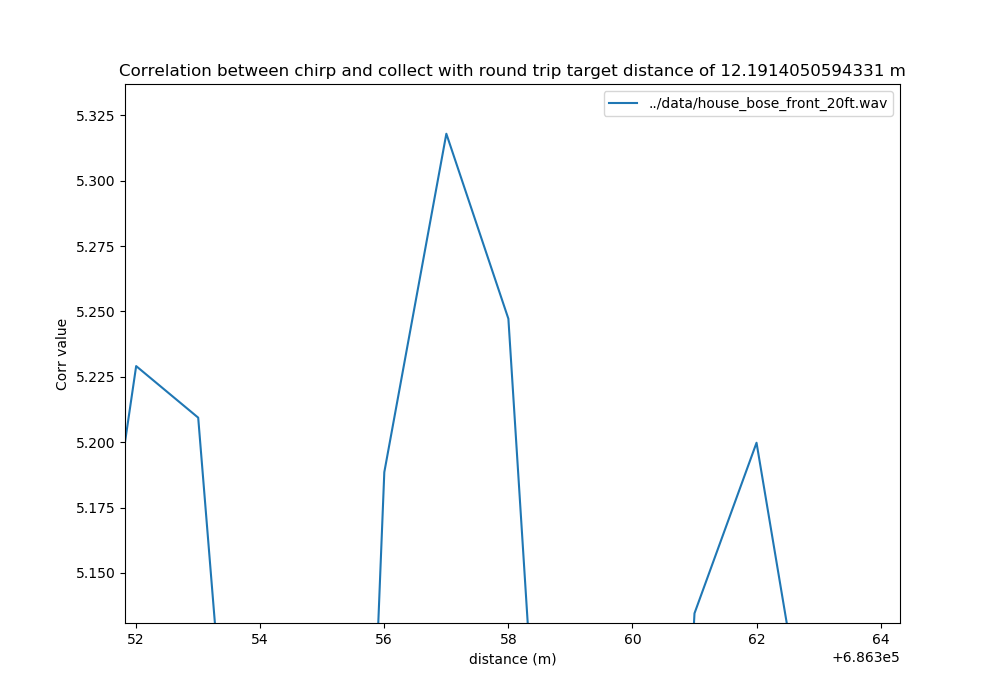

Text(0.5, 1.0, 'Correlation between chirp and collect with round trip target distance of 12.1914050594331 m')

In [23]:
fig = plt.figure(figsize=(10,7))
#subject_data = su.get_subject_data(root_directory, subject=1, trials=trials)
plt.plot(np.log10(np.abs(np.squeeze(chirp_corr[0:1607901]))),label=collect_filename)

plt.xlabel('distance (m)')
plt.ylabel('Corr value')
plt.legend()
plt.title(f'Correlation between chirp and collect with round trip target distance of {round_trip_distance_m} m')

<IPython.core.display.Javascript object>


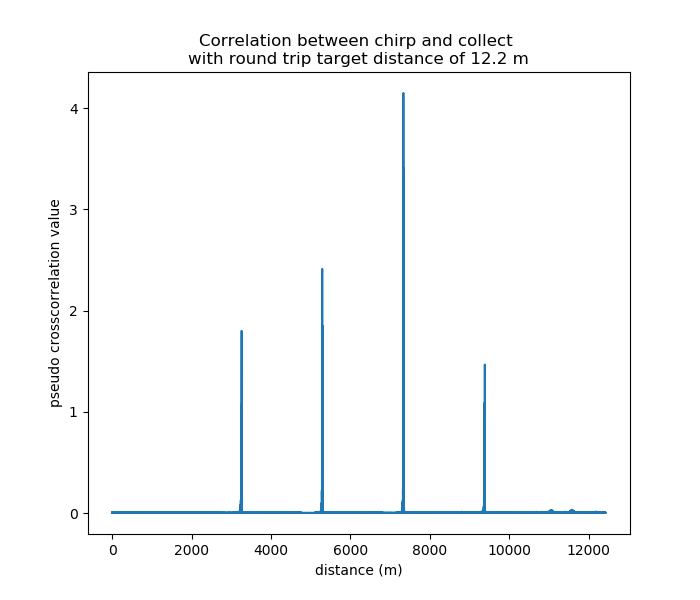

Text(0.5, 1.0, 'Correlation between chirp and collect \nwith round trip target distance of 12.2 m')

In [14]:
fig = plt.figure(figsize=(7,6))
#subject_data = su.get_subject_data(root_directory, subject=1, trials=trials)
plt.plot(d_m[0:-1],(np.abs((np.divide(np.squeeze(chirp_corr[0:1607901]),np.squeeze(energy_level[0:1607901]))))),label=collect_filename)

plt.xlabel('distance (m)')
plt.ylabel('pseudo crosscorrelation value')

plt.title(f'Correlation between chirp and collect \nwith round trip target distance of {round_trip_distance_m:.1f} m')

<IPython.core.display.Javascript object>


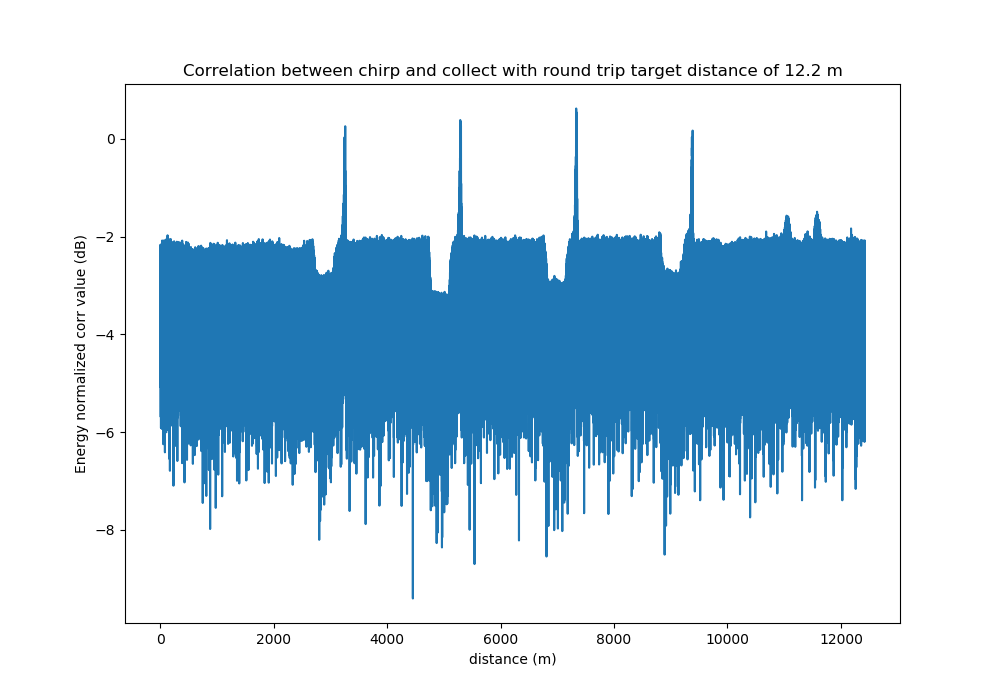

Text(0.5, 1.0, 'Correlation between chirp and collect with round trip target distance of 12.2 m')

In [15]:
fig = plt.figure(figsize=(10,7))
#subject_data = su.get_subject_data(root_directory, subject=1, trials=trials)
plt.plot(d_m[0:-1],np.log10(np.abs((np.divide(np.squeeze(chirp_corr[0:1607901]),np.squeeze(energy_level[0:1607901]))))),label=collect_filename)

plt.xlabel('distance (m)')
plt.ylabel('Energy normalized corr value (dB)')

plt.title(f'Correlation between chirp and collect with round trip target distance of {round_trip_distance_m:.1f} m')

<IPython.core.display.Javascript object>


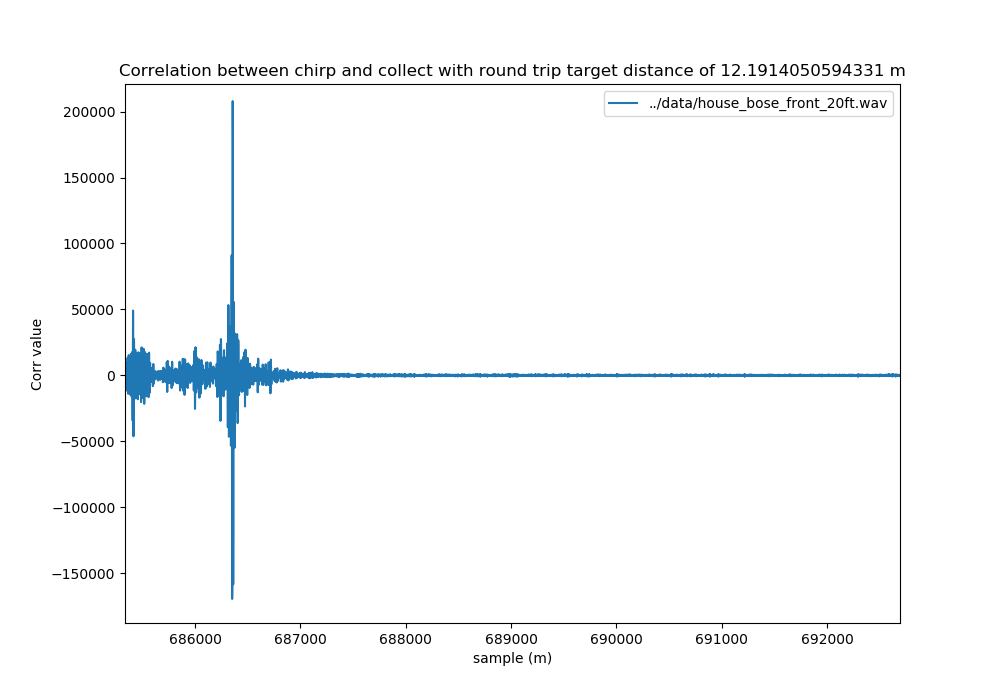

Text(0.5, 1.0, 'Correlation between chirp and collect with round trip target distance of 12.1914050594331 m')

In [28]:
fig = plt.figure(figsize=(10,7))
#subject_data = su.get_subject_data(root_directory, subject=1, trials=trials)
plt.plot(chirp_corr,label=collect_filename)

plt.xlabel('sample')
plt.ylabel('Corr value')
plt.legend()
plt.title(f'Correlation between chirp and collect with round trip target distance of {round_trip_distance_m} m')

<IPython.core.display.Javascript object>


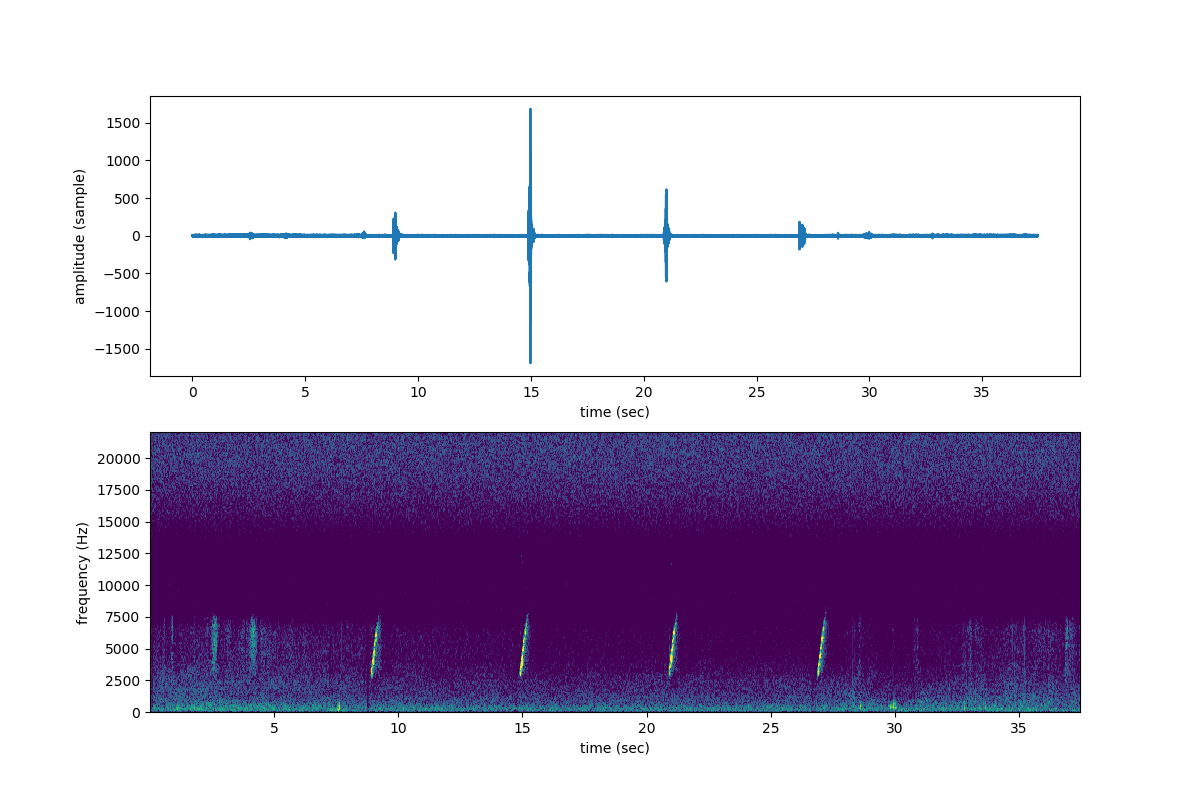

In [17]:
NFFT = 512  # the length of the windowing segments
Fs = collect_fs  # the sampling frequency

t_sec=np.arange(0,collect_data.shape[0],1)/collect_fs
d_m=speed_of_sound_in_air_m_per_sec*t_sec;

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(t_sec, collect_data[:,0])
ax1.set_xlabel('time (sec)')
ax1.set_ylabel('amplitude (sample)')
Pxx, freqs, bins, im = ax2.specgram(collect_data[:,0], NFFT=NFFT, Fs=Fs, noverlap=500)
#fig.colorbar(im)
im.set_clim([-40,5])

ax2.set_xlabel('time (sec)')
ax2.set_ylabel('frequency (Hz)')
plt.show()



<IPython.core.display.Javascript object>


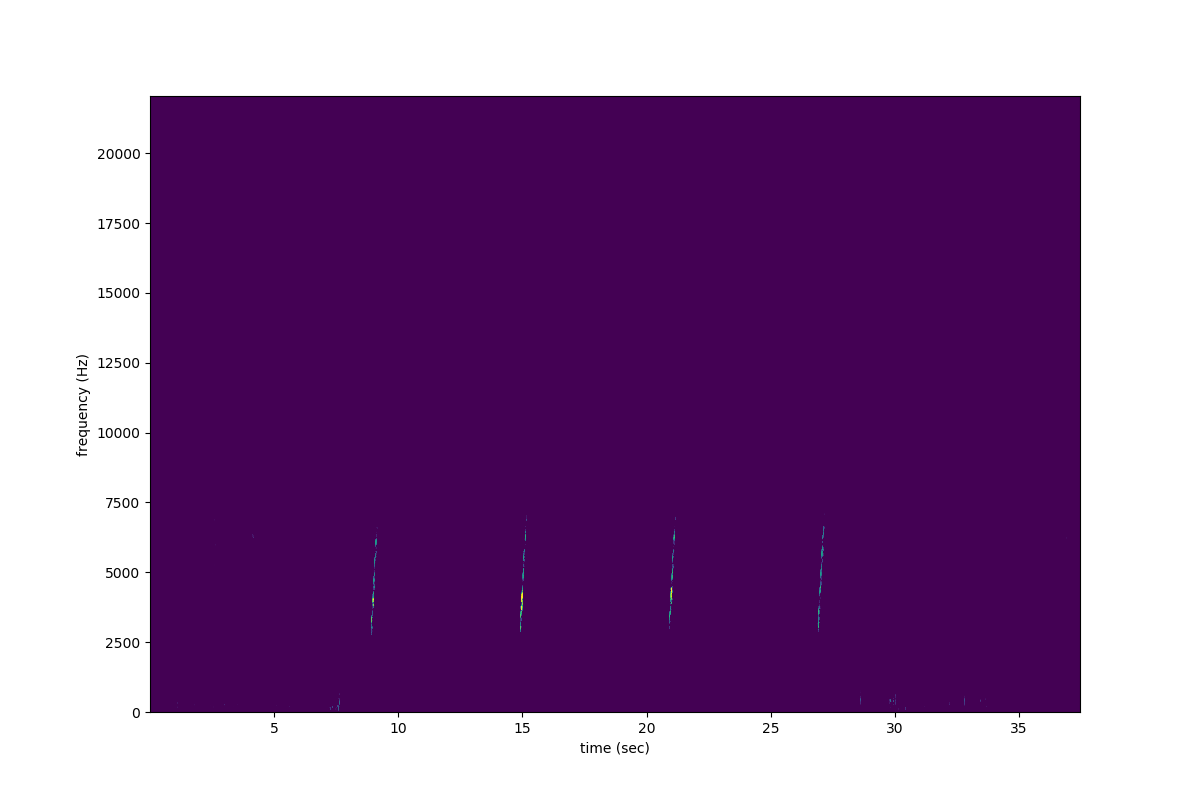

In [18]:
NFFT = 512*2  # the length of the windowing segments
Fs = collect_fs  # the sampling frequency

t_sec=np.arange(0,collect_data.shape[0],1)/collect_fs
d_m=speed_of_sound_in_air_m_per_sec*t_sec;

fig, (ax1) = plt.subplots(nrows=1)
Pxx, freqs, bins, im = ax1.specgram(collect_data[:,0], NFFT=NFFT, Fs=Fs, noverlap=int(NFFT*0.9))
#fig.colorbar(im)
im.set_clim([-10,20])

ax1.set_xlabel('time (sec)')
ax1.set_ylabel('frequency (Hz)')
plt.show()

<IPython.core.display.Javascript object>


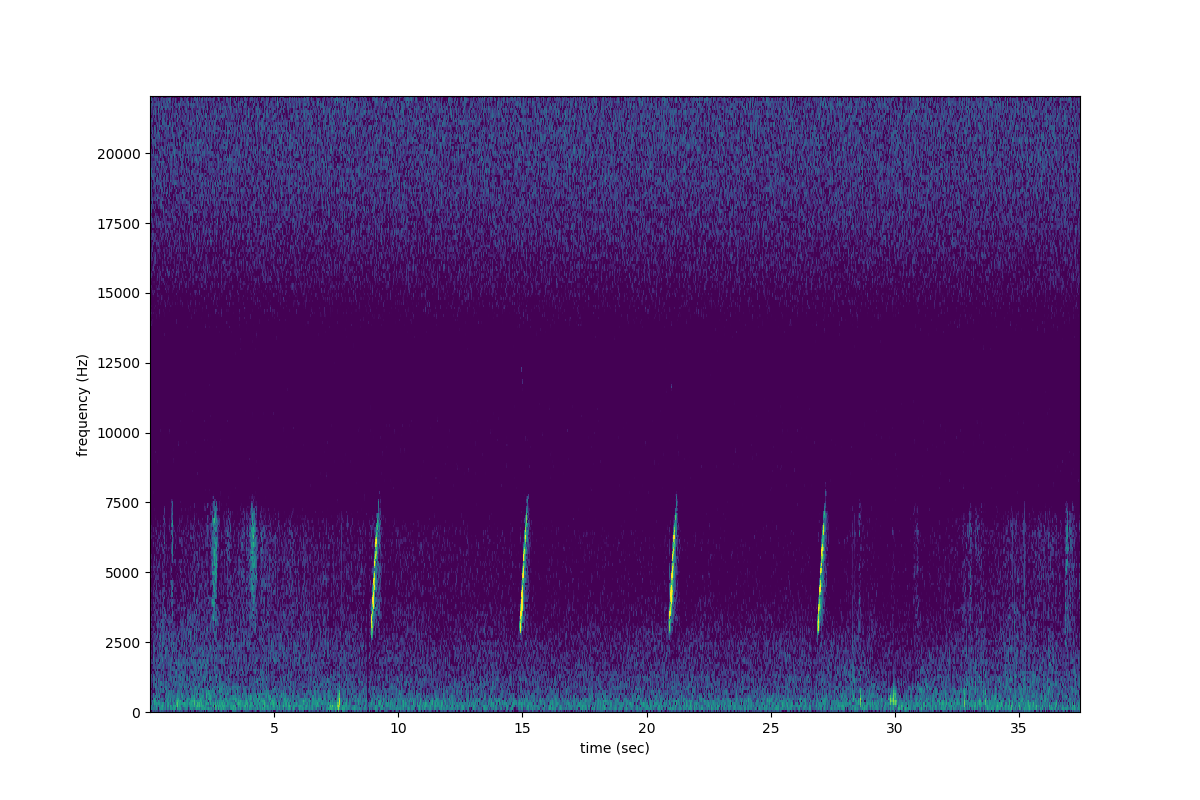

In [19]:
NFFT = 512  # the length of the windowing segments
Fs = collect_fs  # the sampling frequency

t_sec=np.arange(0,collect_data.shape[0],1)/collect_fs

fig, (ax2) = plt.subplots(nrows=1)
Pxx, freqs, bins, im = ax2.specgram(collect_data[:,0], NFFT=NFFT, Fs=Fs, noverlap=500)
#fig.colorbar(im)
im.set_clim([-40,5])

ax2.set_xlabel('time (sec)')
ax2.set_ylabel('frequency (Hz)')
plt.show()


<IPython.core.display.Javascript object>


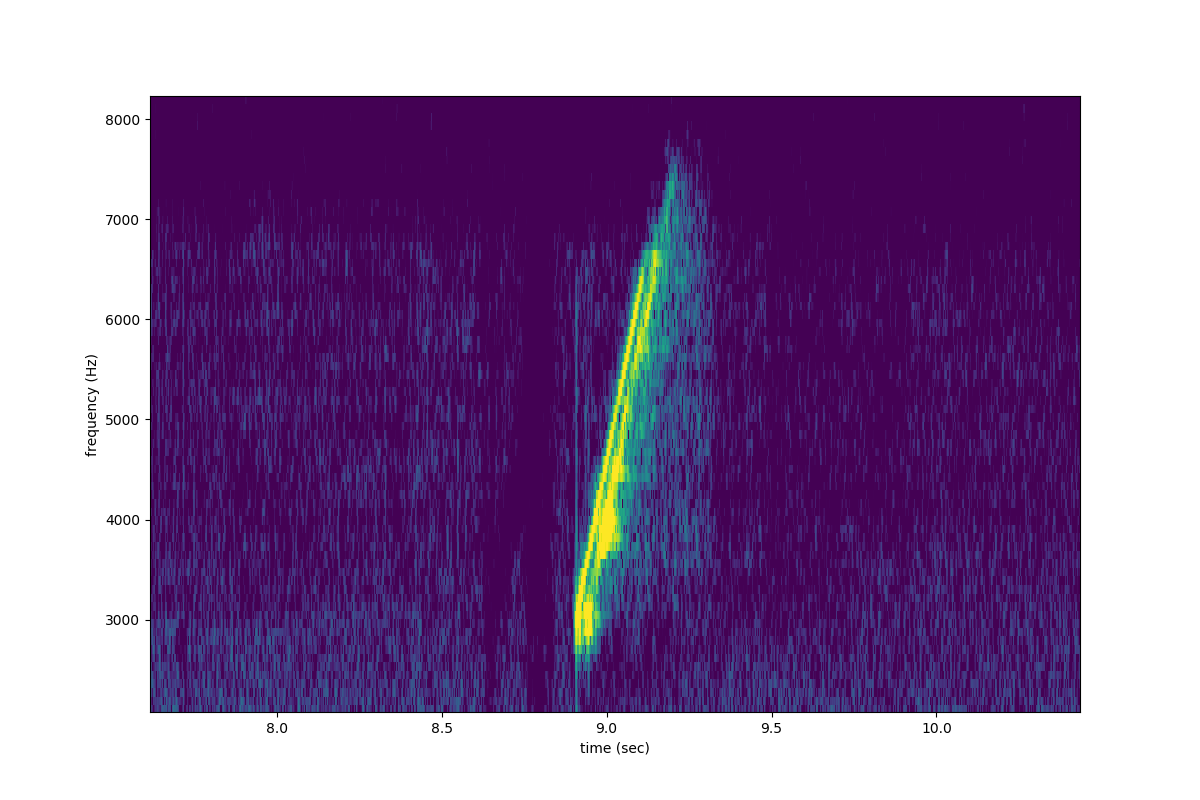

In [20]:
NFFT = 512  # the length of the windowing segments
Fs = original_chirps_fs  # the sampling frequency

t_sec=np.arange(0,original_chirp_data.shape[0],1)/Fs

fig, (ax2) = plt.subplots(nrows=1)
Pxx, freqs, bins, im = ax2.specgram(original_chirp_data, NFFT=NFFT, Fs=Fs, noverlap=500)
#fig.colorbar(im)
im.set_clim([-40,5])

ax2.set_xlabel('time (sec)')
ax2.set_ylabel('frequency (Hz)')
plt.show()

In [21]:
true_target_distance_round_trip_m = 12.2
true_target_time_sec = true_target_distance_round_trip_m/speed_of_sound_in_air_m_per_sec
true_target_freq_Hz = true_target_time_sec*S_Hz_per_sec
print(f'true target_freq_Hz = {true_target_freq_Hz} Hz and target_time_sec = {true_target_time_sec} sec' )

measured_target_time_sec = 15.0467-15.0128
measured_target_freq_Hz = measured_target_time_sec*S_Hz_per_sec
print(f'measured target_freq_Hz = {measured_target_freq_Hz} Hz and target_time_sec = {measured_target_time_sec} sec' )
measured_target_distance_rount_trip_m = speed_of_sound_in_air_m_per_sec*measured_target_time_sec
print(f'measured_target_distance_rount_trip_m = {measured_target_distance_rount_trip_m} m' )
speed_of_sound_in_air_m_per_sec/(17e3*2)*600


true target_freq_Hz = 608.8062622309197 Hz and target_time_sec = 0.03581213307240704 sec
measured target_freq_Hz = 576.2999999999856 Hz and target_time_sec = 0.03389999999999915 sec
measured_target_distance_rount_trip_m = 11.548599999999713 m


6.011764705882354

In [22]:
speed_of_sound_in_air_m_per_sec*0.032

10.901333333333334

<IPython.core.display.Javascript object>


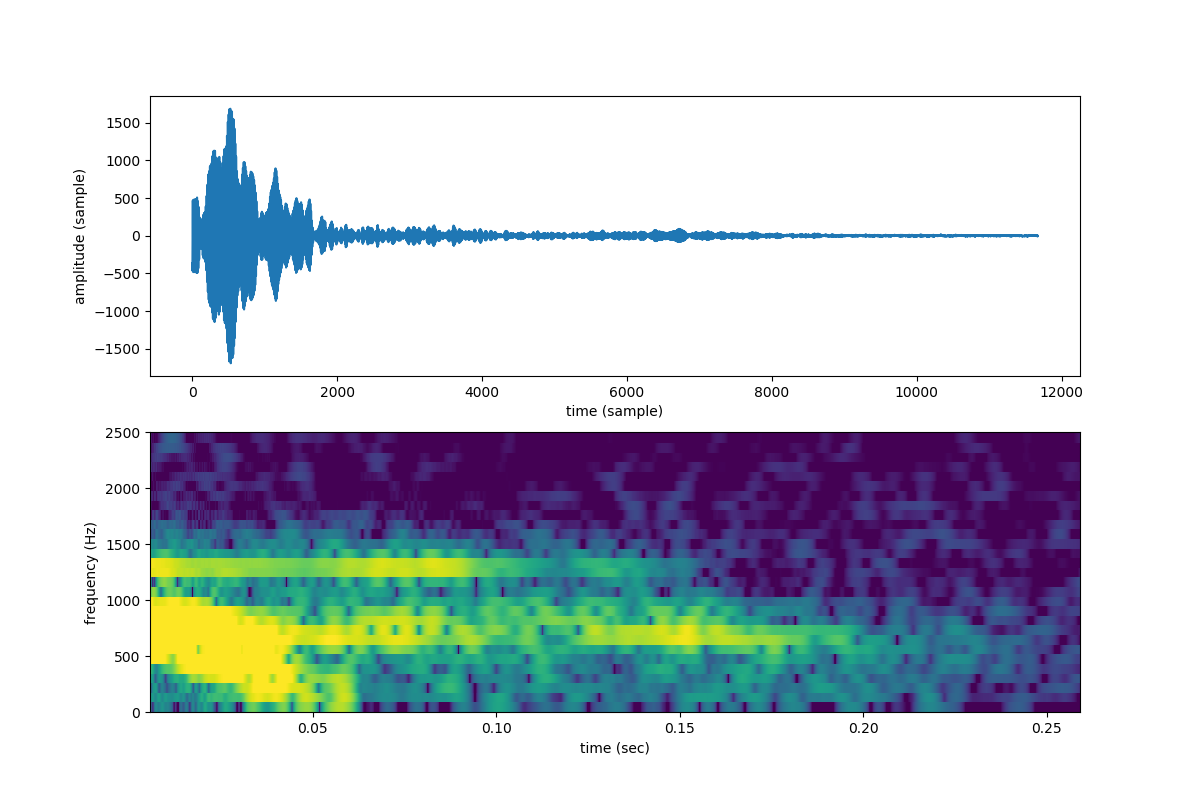

In [71]:
NFFT = 512  # the length of the windowing segments
Fs = collect_fs  # the sampling frequency

total_sample_length=int(float(original_chirp_data.shape[0])*4.5/17.0)
start_index=660000+200
original_chirp_data

fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(collect_data[start_index:(start_index+total_sample_length-1),0])
ax1.set_xlabel('time (sample)')
ax1.set_ylabel('amplitude (sample)')
Pxx, freqs, bins, im = ax2.specgram(collect_data[start_index:(start_index+total_sample_length-1),0]*original_chirp_data[0:(total_sample_length-1)], NFFT=NFFT, Fs=Fs, noverlap=500)
#fig.colorbar(im)
im.set_clim([-40,5])
ax2.set_ylim([0, 2500])

ax2.set_xlabel('time (sec)')
ax2.set_ylabel('frequency (Hz)')
plt.show()


In [73]:
#Write a wav file that is 32-bit floating-point [-1.0,+1.0] np.float32
from scipy.io.wavfile import write

np.real(original_chirp_data[0:(total_sample_length-1)]).astype(np.float32).tofile('../data/audio_chirp_presentation.bin') 
np.real(collect_data[start_index:(start_index+total_sample_length-1),0]).astype(np.float32).tofile('../data/audio_collect_presentation.bin')

